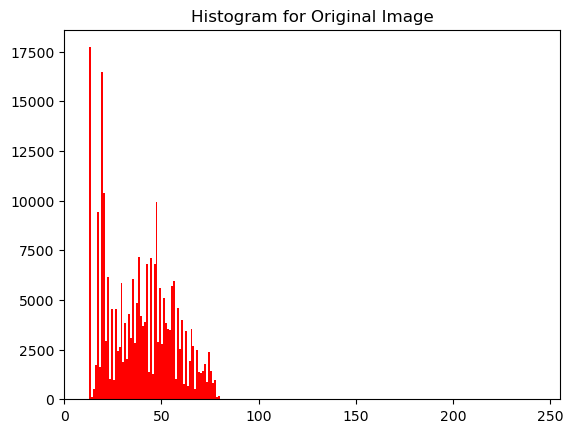

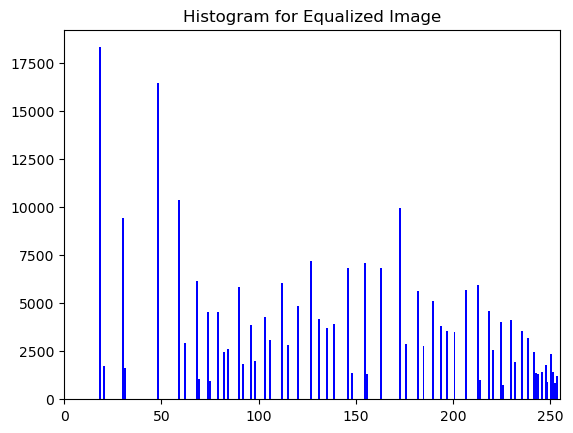

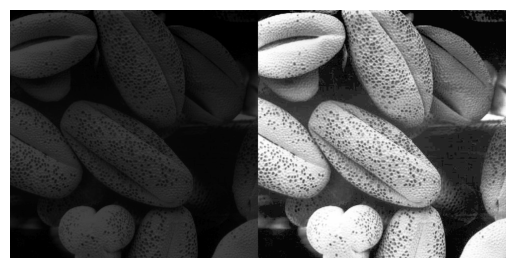

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization_manual(image):
    hist, _ = np.histogram(image, bins=256, range=[0, 255])
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    
    equalized_image = cdf_normalized[image]
    return equalized_image.astype(np.uint8)

img = cv.imread("Input/shells.tif", cv.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img.ravel(), 256, [0, 255])
cdf = hist.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 255])
plt.title('Histogram for Original Image')
plt.savefig('Output/Q5_Historgram_original.png')
plt.show()

equ = histogram_equalization_manual(img)
hist, bins = np.histogram(equ.ravel(), 256, [0, 255])
cdf = hist.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
plt.hist(equ.flatten(), 256, [0, 255], color='b')
plt.xlim([0, 255])
plt.title('Histogram for Equalized Image')
plt.savefig('Output/Historgram_equalized_Q5.png')
plt.show()

res = np.hstack((img, equ))  # stacking images side-by-side
plt.axis('off')
plt.imshow(res, cmap='gray')
# Save the intensity transformation plot
plt.savefig('Output/after_historgram_equalization_Q5.png')

plt.show()
